In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML Sem 5/Dataset ML/Train_data.csv')

In [ ]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
df.isnull().any().sum()

0

In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df['class'].value_counts()

,count
class,
normal,13449
anomaly,11743


In [ ]:
df.duplicated().sum()

0

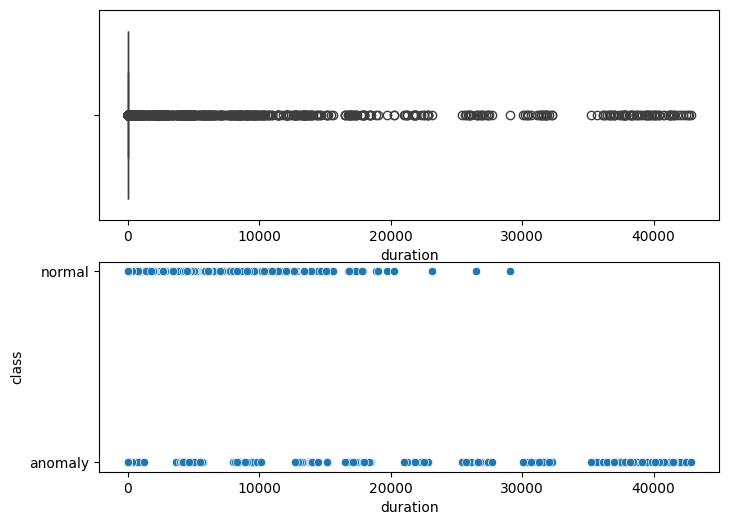

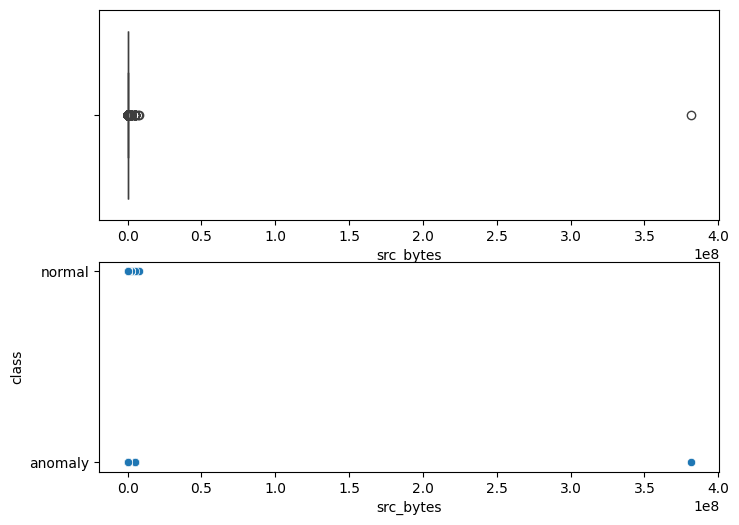

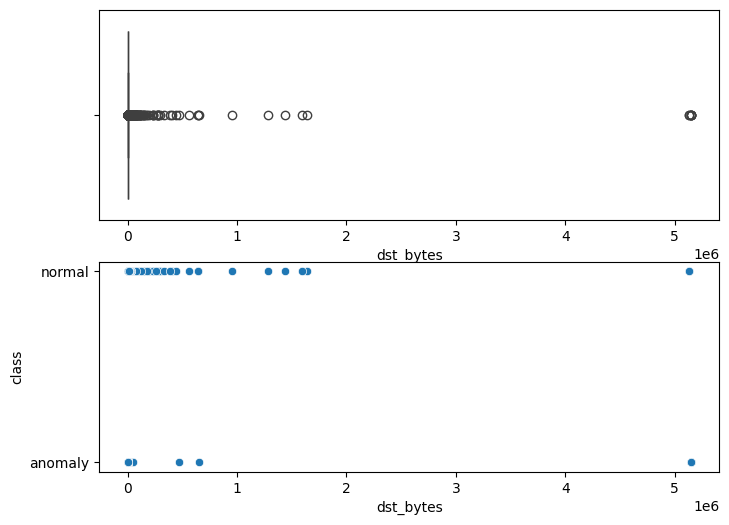

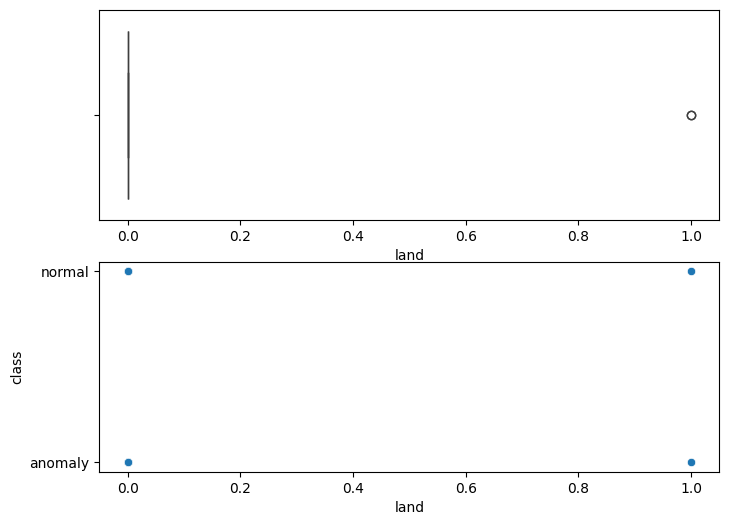

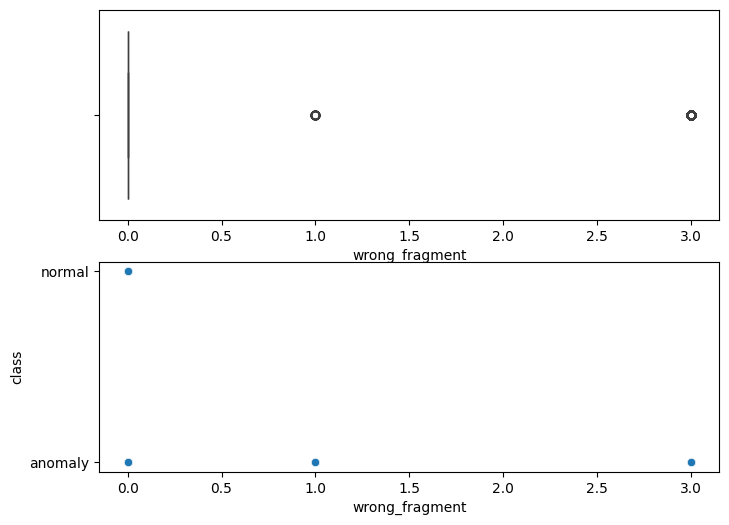

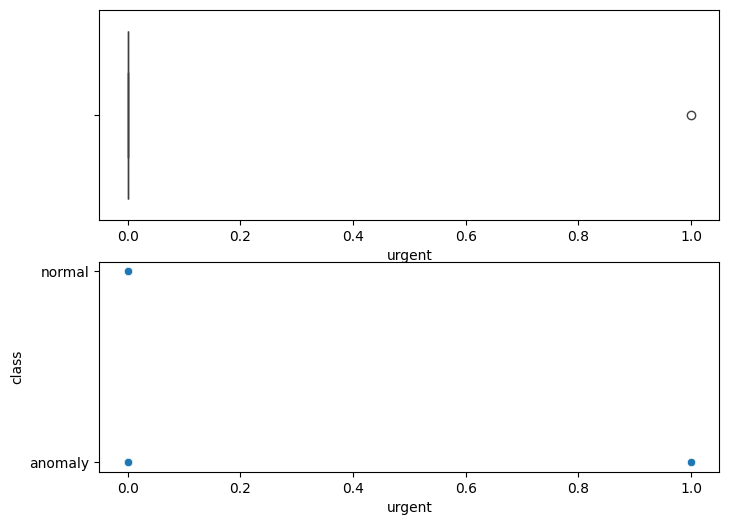

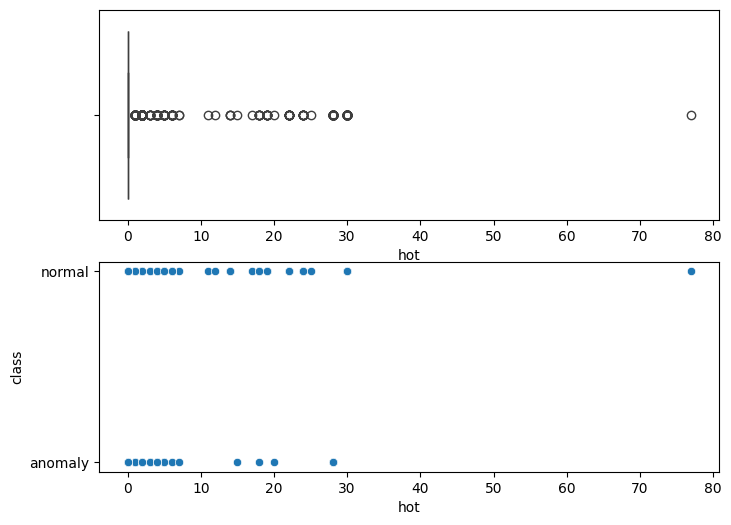

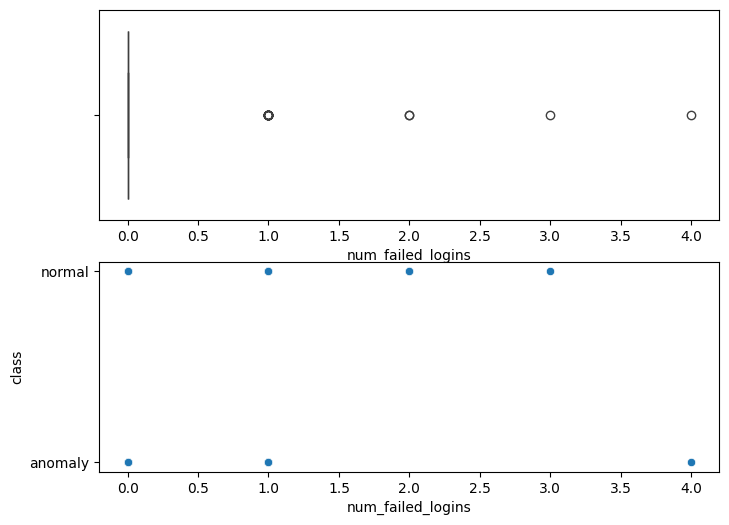

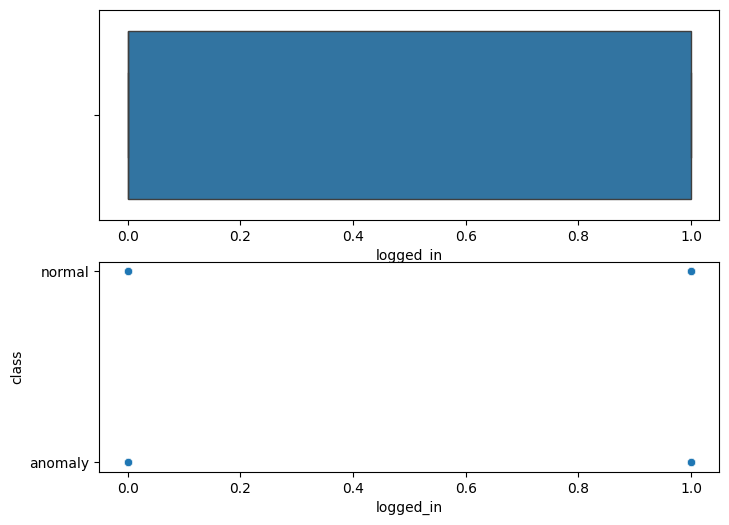

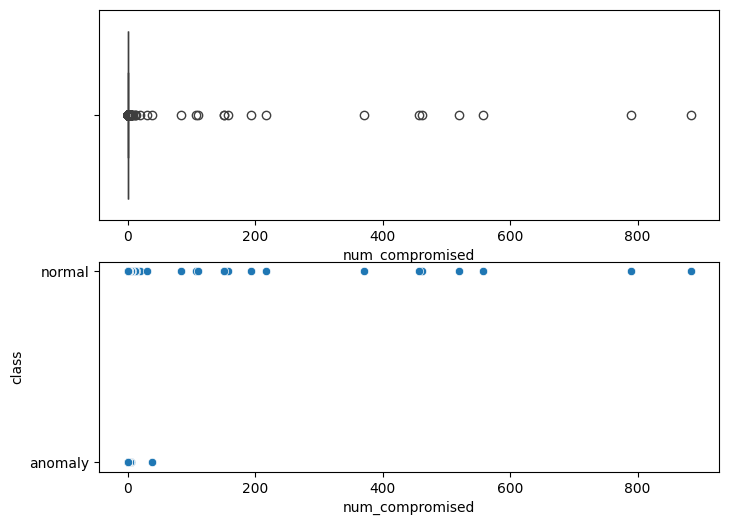

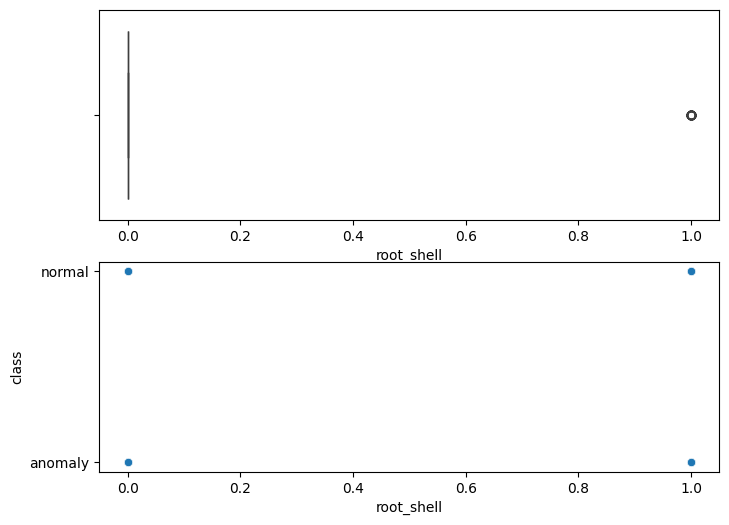

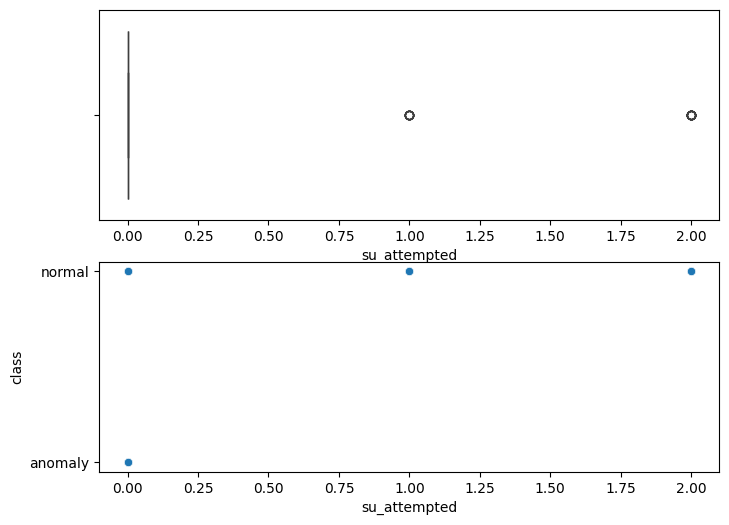

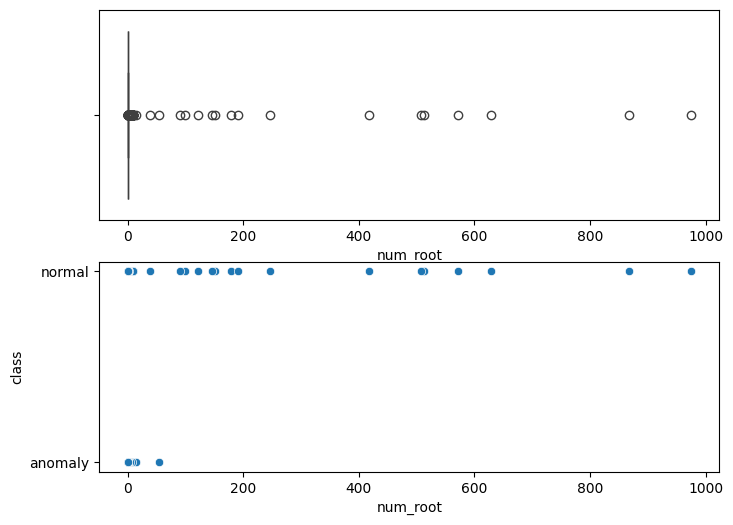

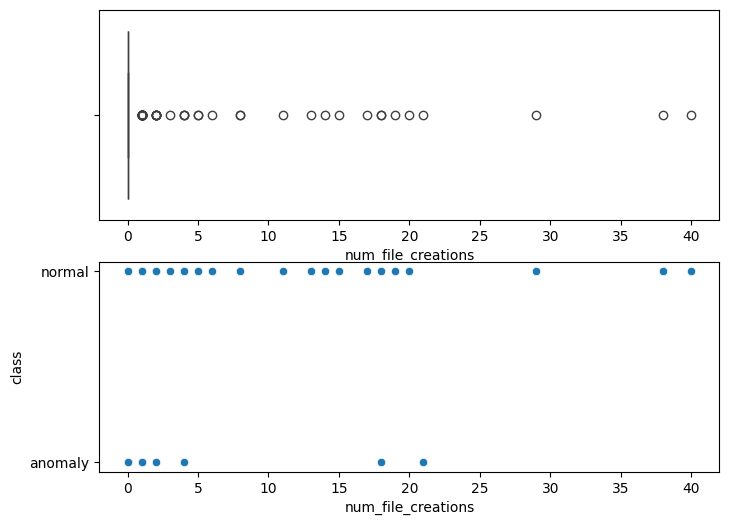

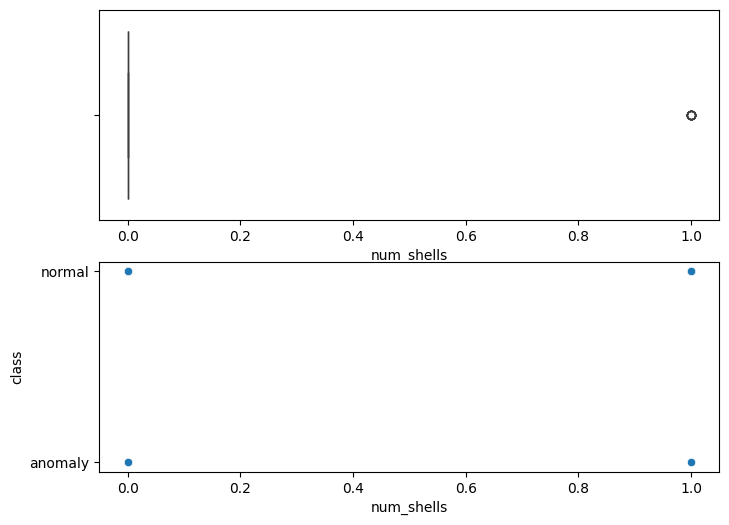

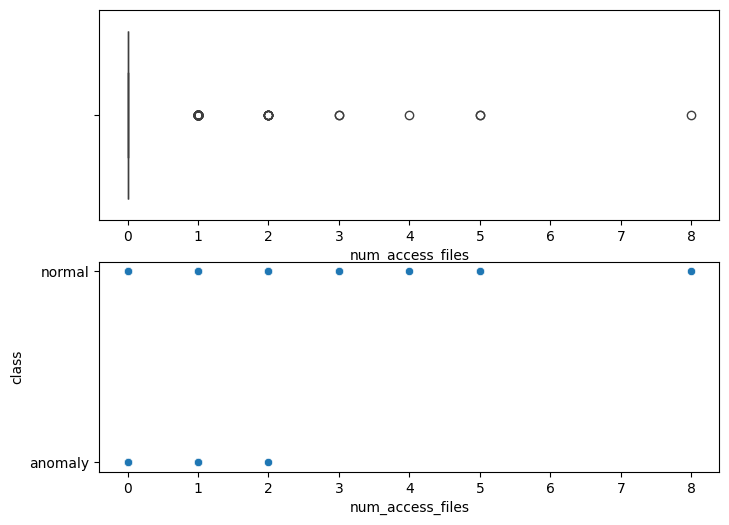

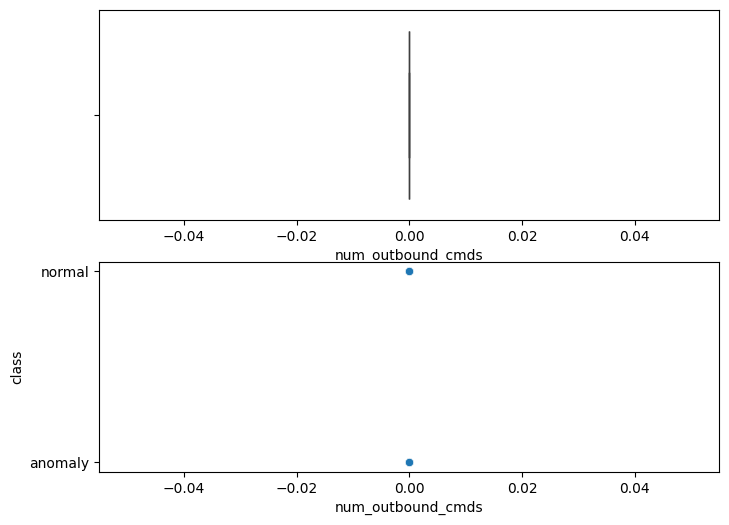

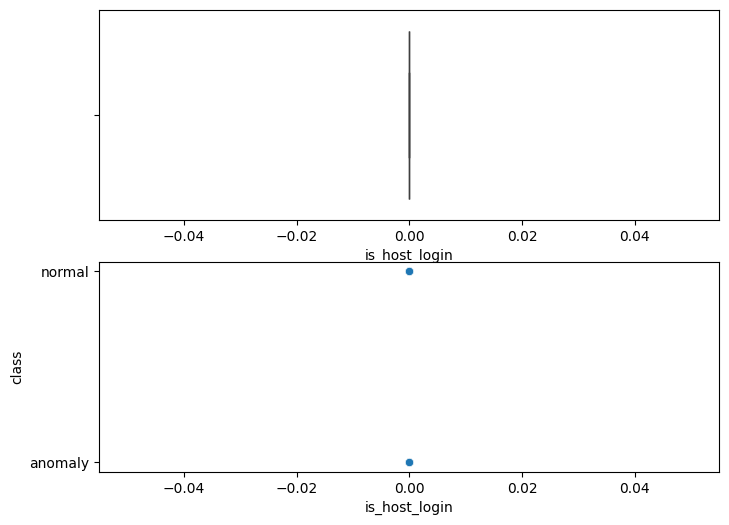

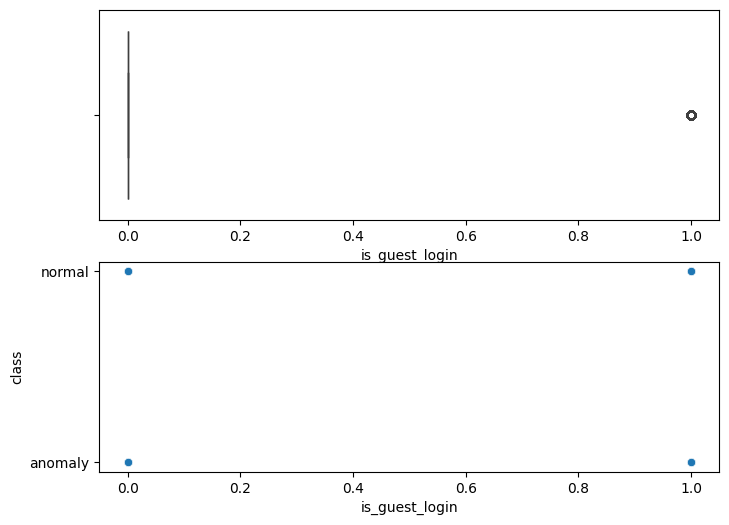

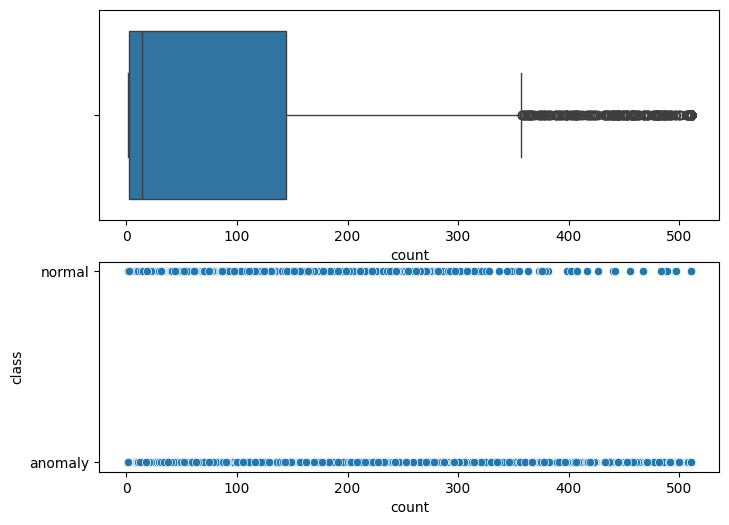

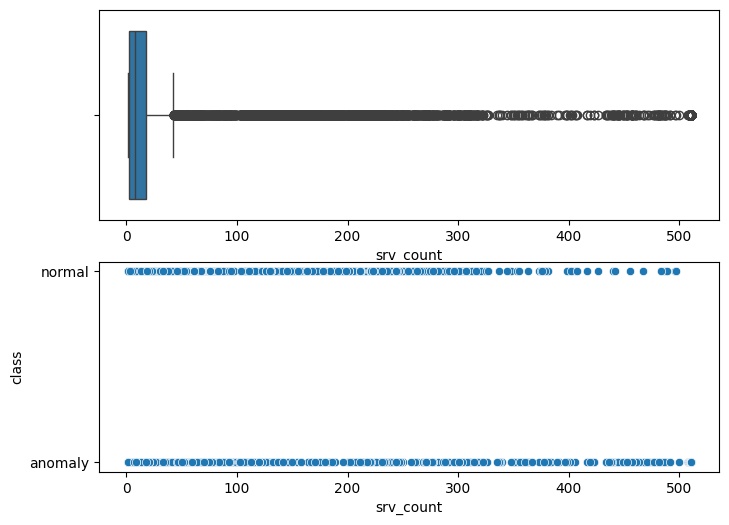

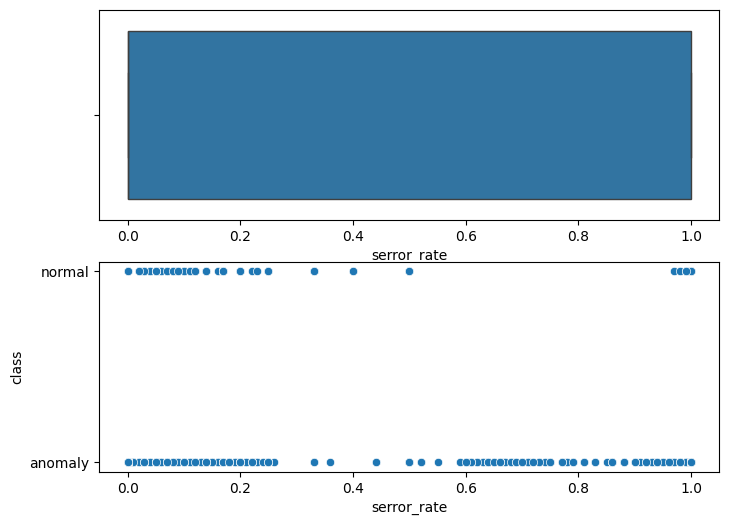

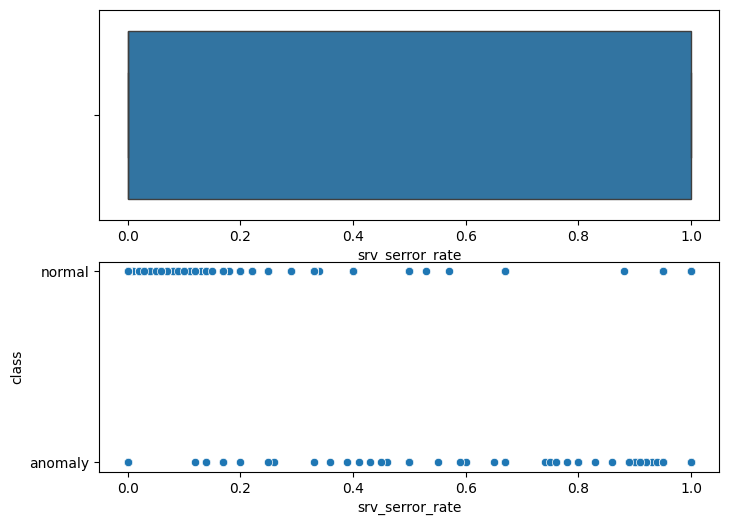

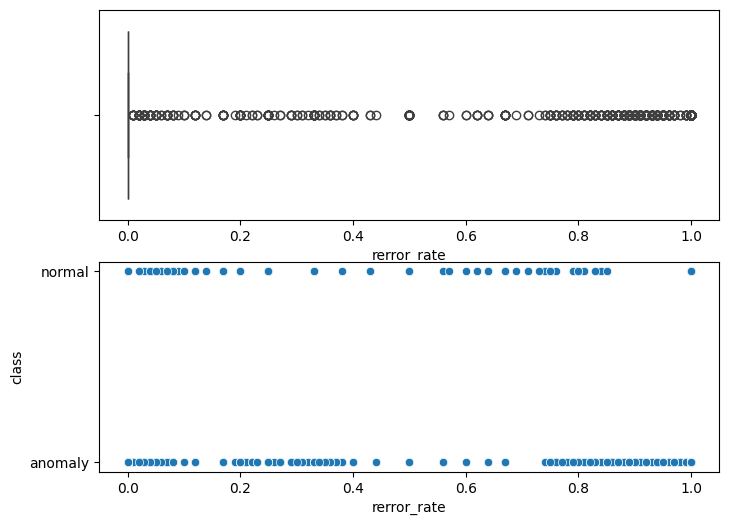

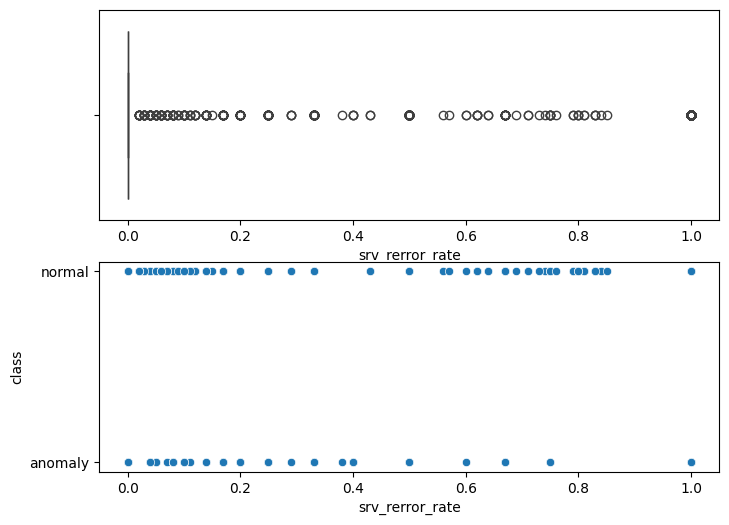

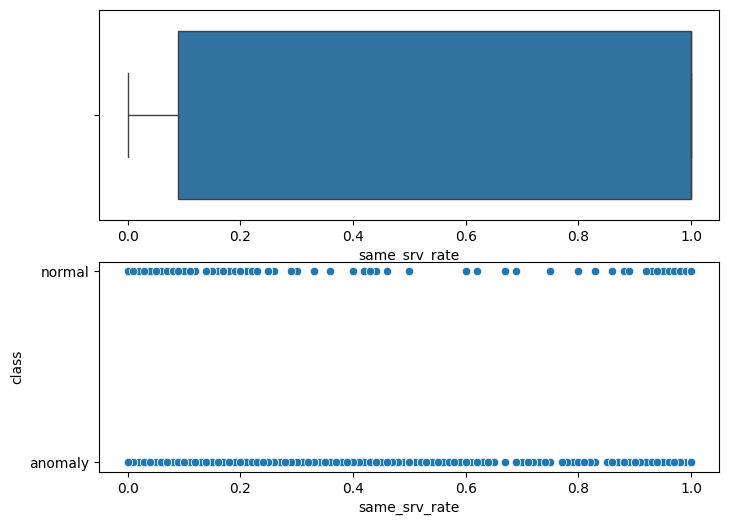

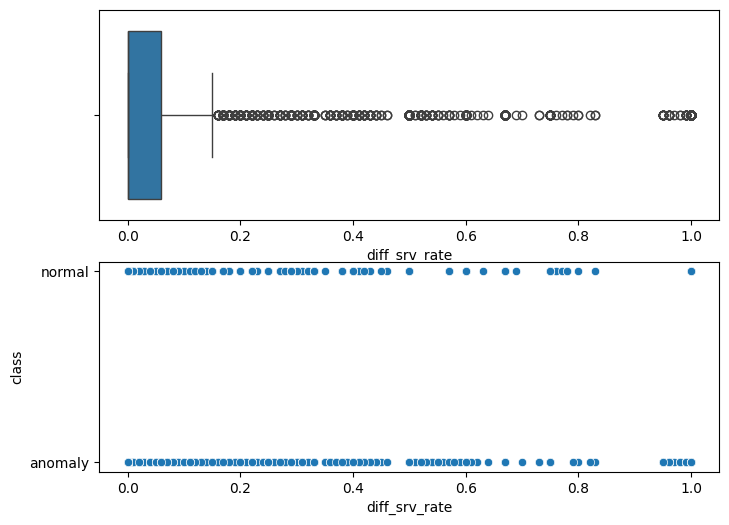

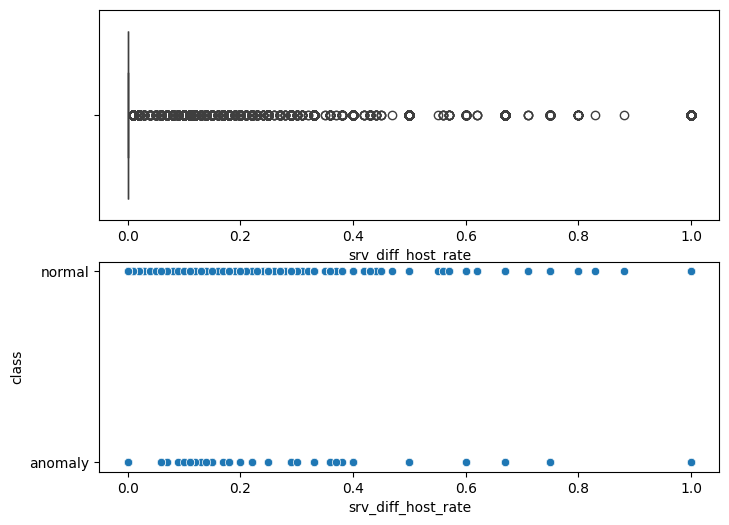

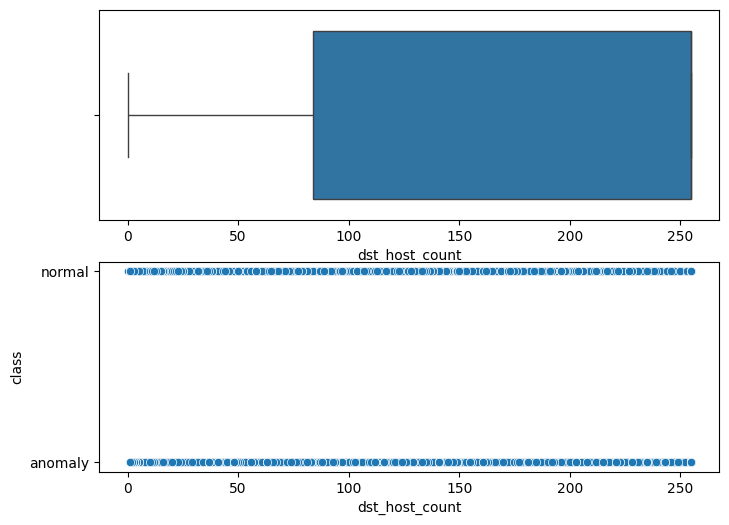

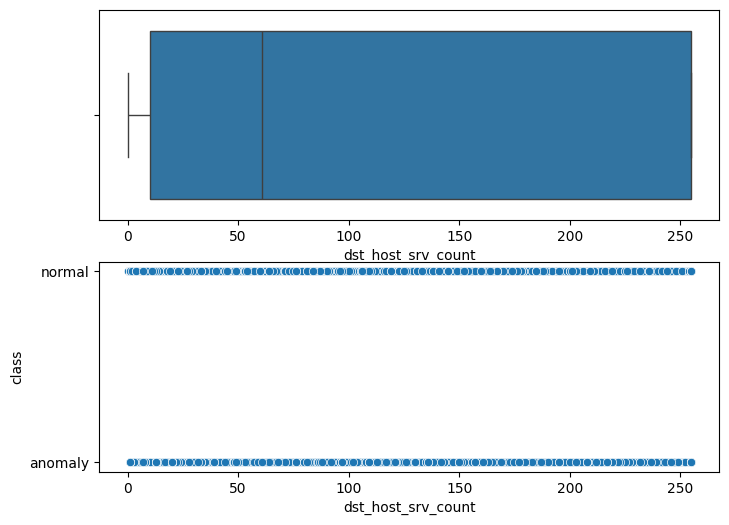

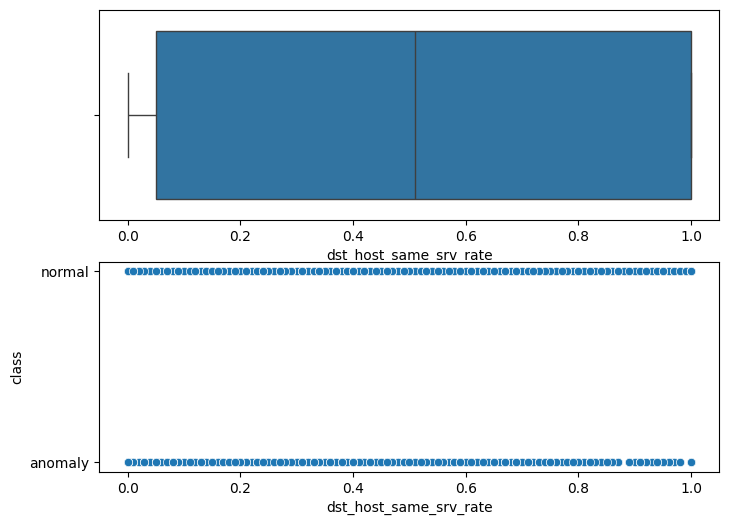

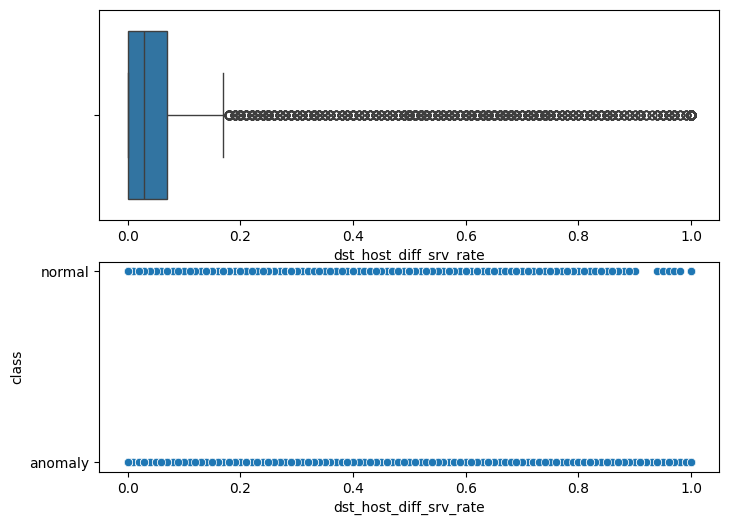

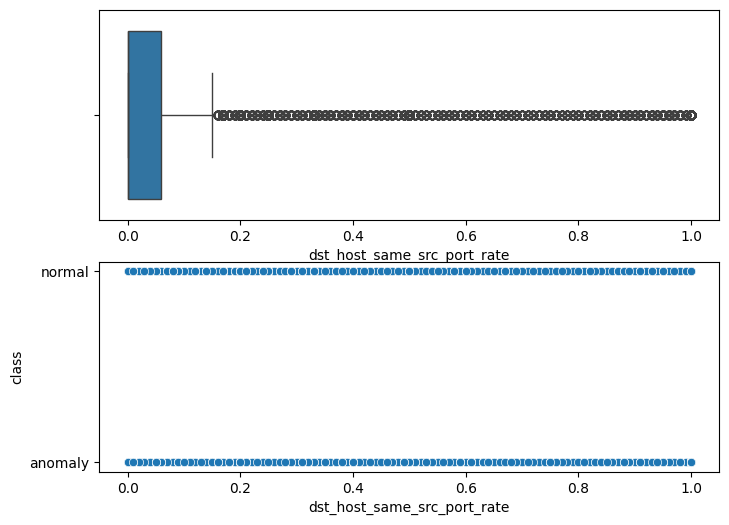

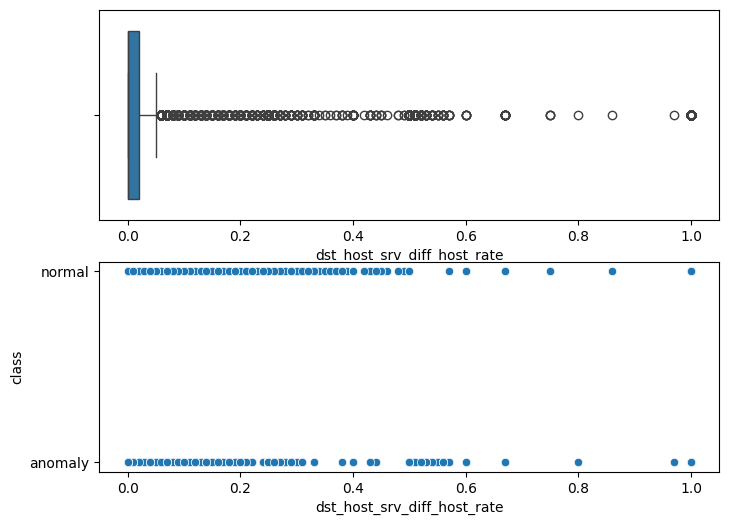

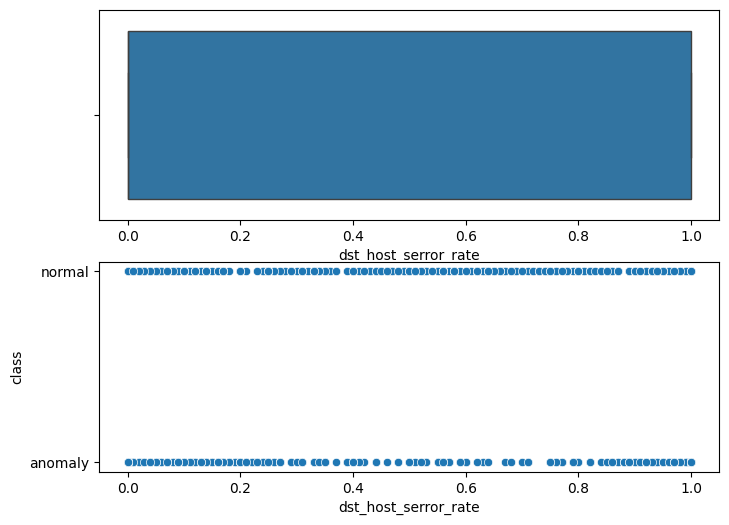

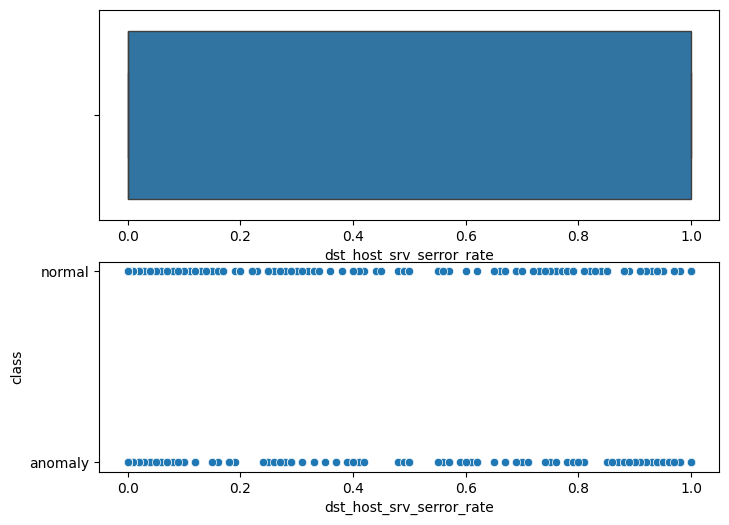

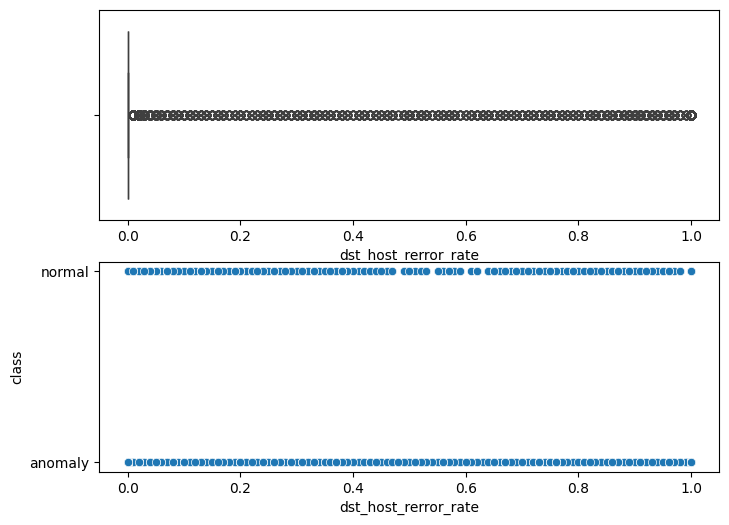

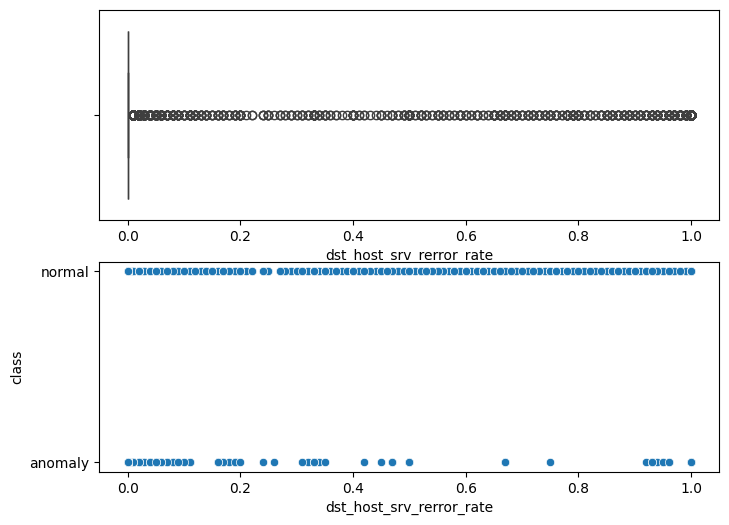

In [ ]:
for col in df:
    if col not in ['class', 'protocol_type', 'service', 'flag']:
        fig, ax = plt.subplots(2, 1, figsize=(8, 6))
        g1 = sns.boxplot(x = df[col], ax=ax[0])
        g2 = sns.scatterplot(data=df, x=df[col],y=df['class'], ax=ax[1])
        plt.show()

In [ ]:
# no outliers

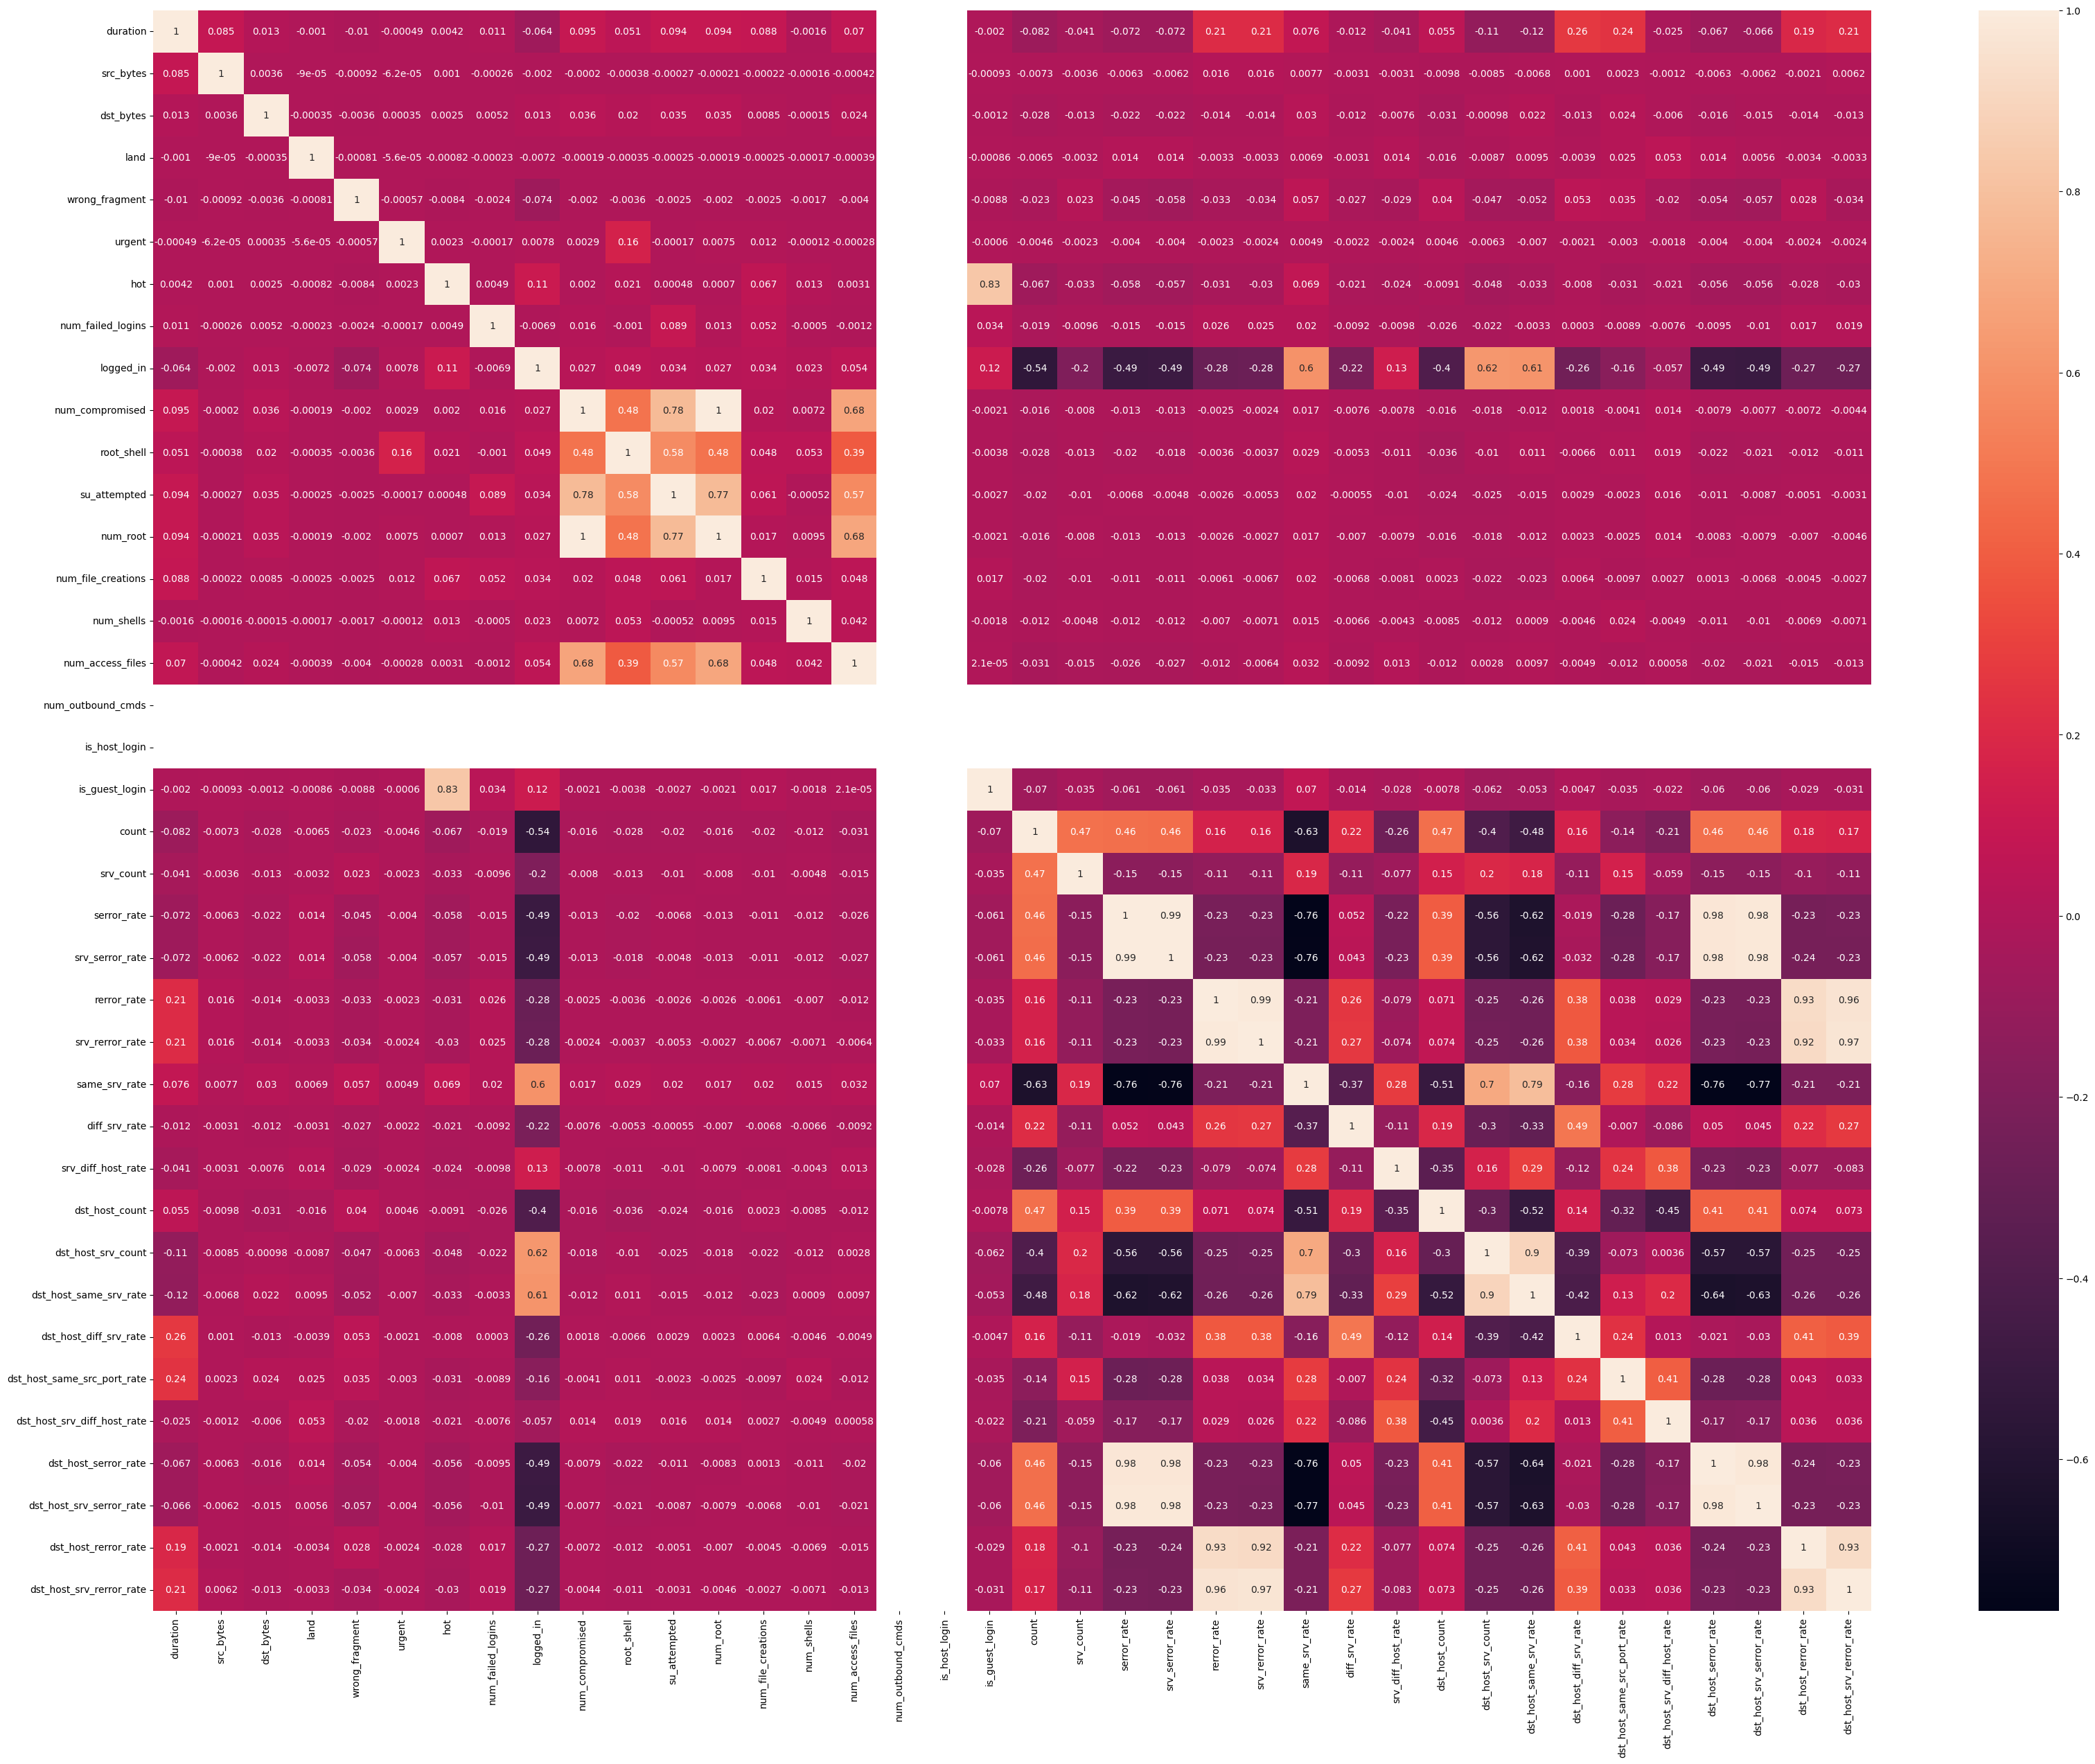

In [ ]:
plt.figure(figsize=(40,30))
sns.heatmap(df.drop(['class', 'protocol_type', 'service', 'flag'], axis=1).corr(), cbar=True, annot=True)
plt.show()

<Axes: xlabel='class', ylabel='count'>

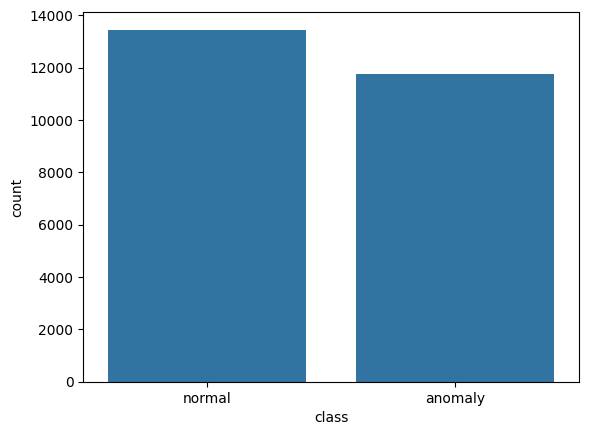

In [ ]:
sns.countplot(x=df['class'])

In [ ]:
X = df.drop(['class'], axis=1)
y = df['class']

In [ ]:
X['protocol_type'].value_counts()

,count
protocol_type,
tcp,20526
udp,3011
icmp,1655


In [ ]:
X['service'].value_counts()

,count
service,
http,8003
private,4351
domain_u,1820
smtp,1449
ftp_data,1396
...,...
urh_i,4
red_i,3
pm_dump,3


In [ ]:
X['flag'].value_counts()

,count
flag,
SF,14973
S0,7009
REJ,2216
RSTR,497
RSTO,304
S1,88
SH,43
RSTOS0,21
S2,21


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

X['protocol_type'] = le1.fit_transform(X['protocol_type'])
X['service'] = le2.fit_transform(X['service'])
X['flag'] = le3.fit_transform(X['flag'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools

In [ ]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X, y)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate']

In [ ]:
X = X[selected_features]

In [ ]:
le4 = LabelEncoder()
y = le4.fit_transform(y)

In [ ]:
X

,protocol_type,service,flag,src_bytes,dst_bytes,count,same_srv_rate,diff_srv_rate,dst_host_same_srv_rate,dst_host_same_src_port_rate
0,1,19,9,491,0,2,1.00,0.00,0.17,0.17
1,2,41,9,146,0,13,0.08,0.15,0.00,0.88
2,1,46,5,0,0,123,0.05,0.07,0.10,0.00
3,1,22,9,232,8153,5,1.00,0.00,1.00,0.03
4,1,22,9,199,420,30,1.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...
25187,1,16,2,0,0,100,0.07,0.07,0.03,0.00
25188,1,19,9,334,0,1,1.00,0.00,1.00,1.00
25189,1,46,1,0,0,105,0.07,0.07,0.05,0.00
25190,1,38,5,0,0,129,0.14,0.06,0.08,0.00


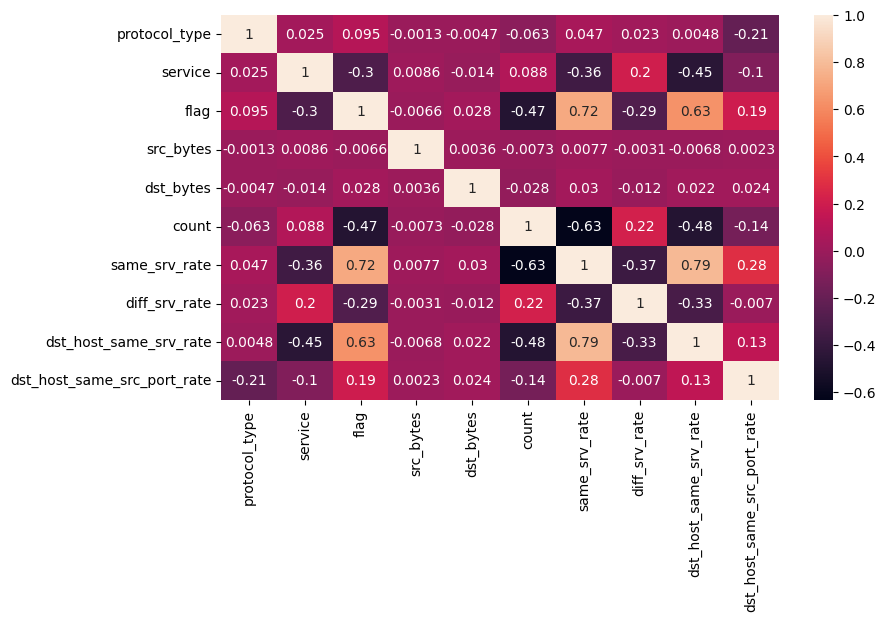

In [ ]:
plt.figure(figsize=(9,5))
sns.heatmap(X.corr(), cbar=True, annot=True)
plt.show()

In [ ]:
# sns.pairplot(X)

In [ ]:
y

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
X_train

array([[-2.46174283, -1.03112583,  0.75073167, ..., -0.34911597,
         1.07179582,  2.76238083],
       [-0.12993689,  1.08531873, -0.74059364, ..., -0.0163234 ,
        -0.93415095, -0.47967572],
       [-0.12993689,  0.76464531,  0.75073167, ...,  1.14845058,
        -1.04559244,  2.27607235],
       ...,
       [-0.12993689, -0.45391368, -2.23191896, ...,  0.03914203,
        -1.11245733, -0.47967572],
       [-0.12993689, -0.45391368,  0.75073167, ..., -0.34911597,
         1.07179582, -0.3175729 ],
       [-0.12993689,  1.08531873, -0.74059364, ..., -0.07178883,
        -1.11245733, -0.47967572]])

In [ ]:
X_test

array([[-2.46174283, -0.96699114,  0.75073167, ..., -0.34911597,
         1.07179582,  2.76238083],
       [-0.12993689, -0.45391368, -2.23191896, ..., -0.34911597,
         1.07179582, -0.41483459],
       [-0.12993689,  1.08531873, -0.74059364, ..., -0.0163234 ,
        -1.13474563, -0.47967572],
       ...,
       [-0.12993689, -0.45391368,  0.75073167, ..., -0.34911597,
         1.07179582, -0.44725516],
       [-0.12993689, -0.45391368,  0.75073167, ..., -0.34911597,
         1.07179582, -0.41483459],
       [-0.12993689, -0.45391368,  0.75073167, ..., -0.34911597,
         1.07179582, -0.47967572]])

In [ ]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
'''
1. train using models diff
2. plot their graph
3. compare
4. bagging and boosting
5. final finetuning
'''

'\n1. train using models diff\n2. plot their graph\n3. compare\n4. bagging and boosting\n5. final finetuning\n'

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
lg_pred = lg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
lg_acc = accuracy_score(y_test,lg_pred)
print(f"Accuracy score = {lg_acc}")
print(confusion_matrix(y_test,lg_pred))
print(classification_report(y_test,lg_pred))

Accuracy score = 0.9460210359198253
[[2201  164]
 [ 108 2566]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2365
           1       0.94      0.96      0.95      2674

    accuracy                           0.95      5039
   macro avg       0.95      0.95      0.95      5039
weighted avg       0.95      0.95      0.95      5039



In [ ]:
#SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [ ]:
svc_pred = svc.predict(X_test)

In [ ]:
svc_acc = accuracy_score(y_test,svc_pred)
print(f"Accuracy score = {svc_acc}")
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

Accuracy score = 0.975590394919627
[[2286   79]
 [  44 2630]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2365
           1       0.97      0.98      0.98      2674

    accuracy                           0.98      5039
   macro avg       0.98      0.98      0.98      5039
weighted avg       0.98      0.98      0.98      5039



In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test,dt_pred)
print(f"Accuracy score = {dt_acc}")
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))

Accuracy score = 0.9968247668188133
[[2356    9]
 [   7 2667]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2365
           1       1.00      1.00      1.00      2674

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



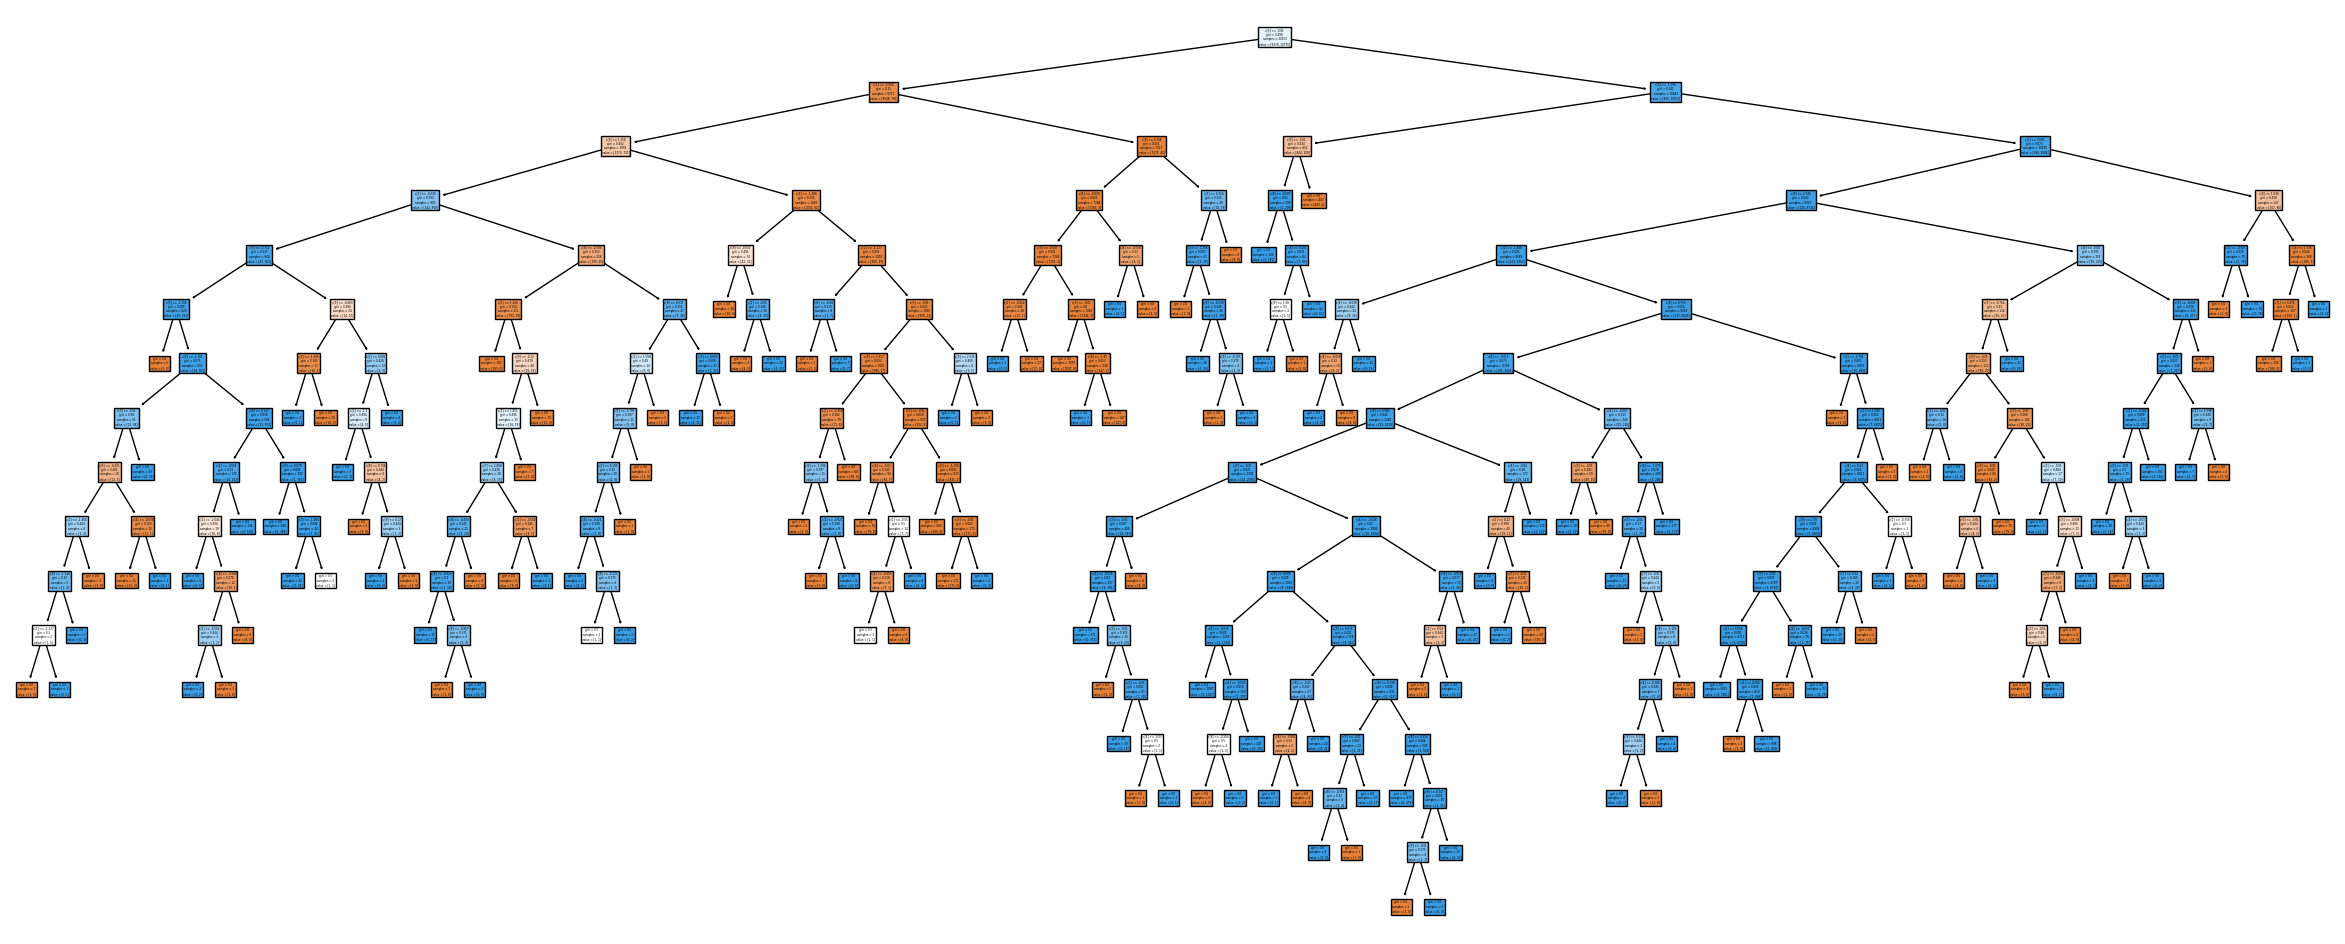

In [ ]:
from sklearn import tree
fig = plt.figure(figsize = (30,12))
tree.plot_tree(dt, filled=True);
plt.show()

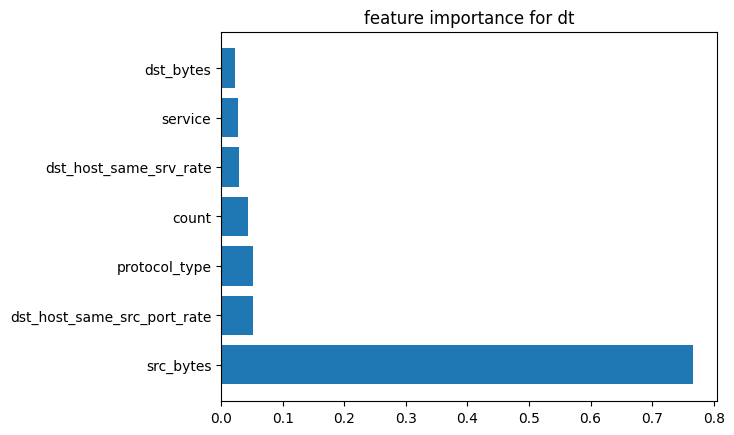

In [ ]:
def f_importance(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importance for dt')
    plt.show()

features_names = selected_features

f_importance(abs(dt.feature_importances_), features_names, top=7)

In [ ]:
#Random Forest
rfc1 = RandomForestClassifier()
rfc1.fit(X_train,y_train)
rfc1_pred = rfc1.predict(X_test)
rfc1_acc = accuracy_score(y_test,rfc1_pred)
print(f"Accuracy score = {rfc1_acc}")
print(confusion_matrix(y_test,rfc1_pred))
print(classification_report(y_test,rfc1_pred))

Accuracy score = 0.9984123834094066
[[2362    3]
 [   5 2669]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2365
           1       1.00      1.00      1.00      2674

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



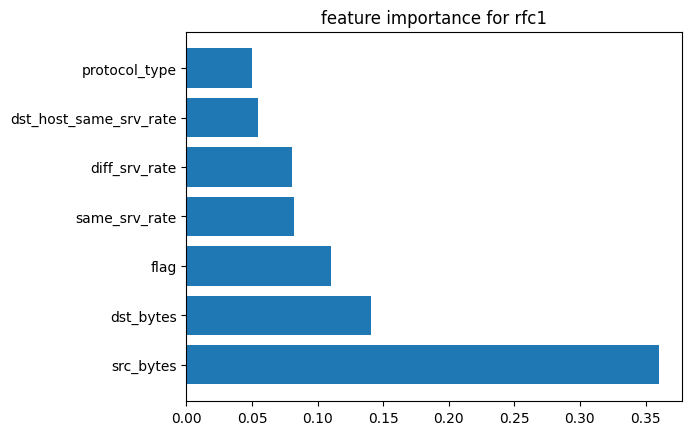

In [ ]:
def f_importance(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importance for rfc1')
    plt.show()

features_names = selected_features

f_importance(abs(rfc1.feature_importances_), features_names, top=7)

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test,knn_pred)
print(f"Accuracy score = {knn_acc}")
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

Accuracy score = 0.9902758483826156
[[2337   28]
 [  21 2653]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2365
           1       0.99      0.99      0.99      2674

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039



In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
gnb_acc = accuracy_score(y_test,gnb_pred)
print(f"Accuracy score = {gnb_acc}")
print(confusion_matrix(y_test,gnb_pred))
print(classification_report(y_test,gnb_pred))

Accuracy score = 0.8964080174637825
[[1982  383]
 [ 139 2535]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      2365
           1       0.87      0.95      0.91      2674

    accuracy                           0.90      5039
   macro avg       0.90      0.89      0.90      5039
weighted avg       0.90      0.90      0.90      5039

